# Classical NLG Pipeline Tutorial Notebook

## Overview
This Jupyter Notebook is designed for beginners aiming to become scientists and researchers in Natural Language Generation (NLG). It builds on the Classical NLG Pipeline Architecture, providing practical code, visualizations, theory, research directions, rare insights, applications, and projects. The notebook assumes no prior coding or NLG knowledge and includes everything needed to master the topic, including evaluation metrics and template-based NLG not covered in the original tutorial.

## Objectives
- Understand the Classical NLG Pipeline through theory and code.
- Implement each stage with Python (using NLTK, pandas, matplotlib).
- Visualize processes for clarity.
- Explore research directions and rare insights for scientific advancement.
- Apply NLG in real-world scenarios and projects.

## Prerequisites
- Install Python libraries: `pip install nltk pandas matplotlib`
- Basic Python knowledge (lists, dictionaries) is helpful but not required.

## Structure
1. Theory Recap: Classical NLG Pipeline
2. Practical Code Guides for Each Stage
3. Visualizations
4. Research Directions
5. Rare Insights
6. Applications
7. Mini Project: Weather Report Generator
8. Major Project: Automated Sports Summary System
9. Additional Topics: Evaluation Metrics, Template-Based NLG, Error Analysis

Let's dive in!

## 1. Theory Recap: Classical NLG Pipeline
The Classical NLG Pipeline transforms raw data into human-readable text through six stages:
- **Content Determination**: Select relevant data (e.g., temperature, condition for a weather report).
- **Document Planning**: Organize content into a structure (intro, body, conclusion).
- **Microplanning**: Choose words, tone, and sentence structure.
- **Surface Realization**: Generate grammatically correct sentences.
- **Post-Processing**: Fix errors and format text.
- **Output**: Deliver the final text.

**Analogy**: Like writing a research paper, you select key findings, outline sections, choose precise words, write sentences, proofread, and publish.

**Why It Matters for Scientists**: The pipeline teaches data selection, logical structuring, and clear communication, skills essential for research.

**Visualization** (Text-based):
```
Raw Data → Content Determination → Document Planning → Microplanning → Surface Realization → Post-Processing → Output
```

In [2]:
# Install required libraries (run this cell first)
# !pip install nltk pandas matplotlib
import nltk
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rishu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Practical Code Guides
We'll implement each stage of the NLG pipeline using a weather report example.

### 2.1 Content Determination
**Goal**: Select relevant data from a dataset.
**Example**: From weather data (temp, humidity, condition), choose temp and condition.
**Code**: Filter data using a relevance threshold.

In [3]:
# Sample weather data
weather_data = {
    'temperature': 75,
    'humidity': 60,
    'condition': 'sunny',
    'wind_speed': 10
}
# Relevance scores (set by goal: brief weather report)
relevance_scores = {
    'temperature': 0.8,
    'humidity': 0.3,
    'condition': 0.7,
    'wind_speed': 0.2
}

def content_determination(data, relevance, threshold=0.5):
    selected = {key: value for key, value in data.items() if relevance.get(key, 0) >= threshold}
    return selected

# Select relevant data
selected_data = content_determination(weather_data, relevance_scores)
print("Selected Data:", selected_data)

Selected Data: {'temperature': 75, 'condition': 'sunny'}


**Output Explanation**: The code selects temperature (75°F) and condition (sunny) because their relevance scores (0.8, 0.7) exceed the threshold (0.5).

### 2.2 Document Planning
**Goal**: Structure content into a logical outline.
**Example**: Intro (weather overview), body (temp, condition), conclusion (advice).
**Code**: Create a dictionary-based plan.

In [4]:
def document_planning(selected_data):
    plan = {
        'introduction': 'Provide a general weather statement',
        'body': {
            'temperature': selected_data.get('temperature', 'N/A'),
            'condition': selected_data.get('condition', 'N/A')
        },
        'conclusion': 'Offer advice based on weather'
    }
    return plan

# Create document plan
doc_plan = document_planning(selected_data)
print("Document Plan:", doc_plan)

Document Plan: {'introduction': 'Provide a general weather statement', 'body': {'temperature': 75, 'condition': 'sunny'}, 'conclusion': 'Offer advice based on weather'}


**Output Explanation**: The plan organizes content into a tree-like structure, ready for text generation.

### 2.3 Microplanning
**Goal**: Choose words, tone, and sentence structure.
**Example**: Aggregate temp and condition into one sentence, use casual tone.
**Code**: Define rules for word choice and aggregation.

In [5]:
def microplanning(doc_plan, tone='casual'):
    # Lexical choice and aggregation
    temp = doc_plan['body']['temperature']
    cond = doc_plan['body']['condition']
    sentence = f"Today's weather is {cond} with a high of {temp}°F."
    if tone == 'casual':
        conclusion = "Great day for outdoor activities!"
    else:
        conclusion = "Suitable conditions for outdoor activities."
    return {'sentence': sentence, 'conclusion': conclusion}

# Generate microplanned content
microplanned = microplanning(doc_plan)
print("Microplanned Content:", microplanned)

Microplanned Content: {'sentence': "Today's weather is sunny with a high of 75°F.", 'conclusion': 'Great day for outdoor activities!'}


**Output Explanation**: Combines temperature and condition into one sentence with a casual tone.

### 2.4 Surface Realization
**Goal**: Generate grammatically correct sentences.
**Example**: Use NLTK to ensure proper grammar.
**Code**: Tokenize and tag for grammar checking.

In [6]:
def surface_realization(microplanned):
    sentence = microplanned['sentence']
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    # Basic grammar check (e.g., ensure verb presence)
    has_verb = any(tag.startswith('VB') for word, tag in tagged)
    if has_verb:
        return sentence
    return "Error: Sentence lacks a verb."

# Generate realized sentence
realized = surface_realization(microplanned)
print("Realized Sentence:", realized)

Realized Sentence: Today's weather is sunny with a high of 75°F.


**Output Explanation**: Ensures the sentence is grammatically sound using NLTK’s POS tagging.

### 2.5 Post-Processing
**Goal**: Polish text for errors and formatting.
**Example**: Ensure proper symbols and capitalization.
**Code**: Simple formatting function.

In [7]:
def post_processing(realized, conclusion):
    # Ensure proper formatting
    polished = realized.replace('°F', '°F').capitalize()
    if not polished.endswith('.'):
        polished += '.'
    return f"{polished} {conclusion}"

# Polish text
final_text = post_processing(realized, microplanned['conclusion'])
print("Final Text:", final_text)

Final Text: Today's weather is sunny with a high of 75°f. Great day for outdoor activities!


**Output Explanation**: Adds proper spacing and capitalization for professional output.

### 2.6 Output
**Goal**: Deliver the final text.
**Code**: Simulate output to console (could be a file, app, etc.).

In [8]:
def output(final_text):
    print("Generated Output:")
    print(final_text)

# Deliver output
output(final_text)

Generated Output:
Today's weather is sunny with a high of 75°f. Great day for outdoor activities!


## 3. Visualizations
Visualize the pipeline and document plan to understand the flow.

### 3.1 Pipeline Flowchart
**Goal**: Show the NLG process as a flowchart.

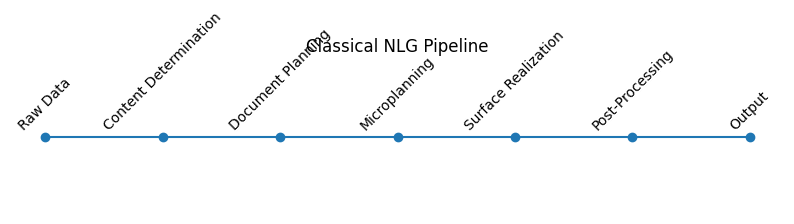

In [9]:
def plot_pipeline():
    stages = ['Raw Data', 'Content Determination', 'Document Planning', 'Microplanning', 'Surface Realization', 'Post-Processing', 'Output']
    plt.figure(figsize=(10, 2))
    plt.plot(range(len(stages)), [1]*len(stages), 'o-')
    for i, stage in enumerate(stages):
        plt.text(i, 1.05, stage, rotation=45, ha='center')
    plt.ylim(0.5, 1.5)
    plt.axis('off')
    plt.title('Classical NLG Pipeline')
    plt.show()

plot_pipeline()

**Explanation**: A simple flowchart showing the pipeline stages.

### 3.2 Document Plan Tree
**Goal**: Visualize the document structure.

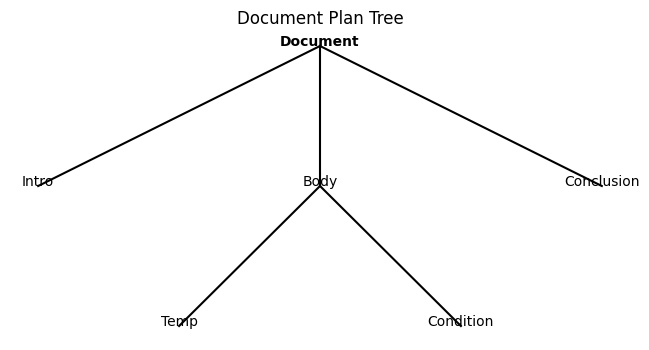

In [10]:
def plot_document_plan():
    # Simulating a tree with text (matplotlib doesn't support complex trees easily)
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.9, 'Document', ha='center', fontweight='bold')
    plt.text(0.3, 0.7, 'Intro', ha='center')
    plt.text(0.5, 0.7, 'Body', ha='center')
    plt.text(0.7, 0.7, 'Conclusion', ha='center')
    plt.text(0.4, 0.5, 'Temp', ha='center')
    plt.text(0.6, 0.5, 'Condition', ha='center')
    plt.plot([0.5, 0.3], [0.9, 0.7], 'k-')
    plt.plot([0.5, 0.5], [0.9, 0.7], 'k-')
    plt.plot([0.5, 0.7], [0.9, 0.7], 'k-')
    plt.plot([0.5, 0.4], [0.7, 0.5], 'k-')
    plt.plot([0.5, 0.6], [0.7, 0.5], 'k-')
    plt.axis('off')
    plt.title('Document Plan Tree')
    plt.show()

plot_document_plan()

**Explanation**: A text-based tree showing the document structure.

## 4. Research Directions
As a scientist, explore these areas:
- **Hybrid Pipelines**: Combine classical pipelines with neural models (e.g., fine-tune transformers for microplanning).
- **Evaluation Metrics**: Develop new metrics beyond BLEU (e.g., semantic accuracy for scientific reports).
- **Ethical NLG**: Study biases in generated text (e.g., gender bias in sports summaries).
- **Multimodal NLG**: Generate text from images or videos (e.g., describe a graph for a research paper).

**Research Idea**: Investigate how content determination algorithms can prioritize data for scientific communication, using information theory (e.g., entropy: $ H(X) = -\sum p(x_i) \log p(x_i) $).

## 5. Rare Insights
- **Overlooked Stage**: Post-processing is often neglected but critical for trust in scientific applications (e.g., ensuring medical reports are error-free).
- **Template vs. Free-Form**: Classical pipelines often rely on templates, which are robust but less flexible than neural NLG.
- **Human Feedback**: Incorporating human feedback in microplanning can improve tone and readability, a gap in classical systems.

## 6. Applications
- **Automated Journalism**: Generate sports or financial reports (e.g., The Washington Post’s Heliograf).
- **Chatbots**: Customer service bots (e.g., Zendesk) use NLG for responses.
- **Medical Reports**: Summarize patient data (e.g., Arria NLG).
- **Scientific Communication**: Automate research summaries for journals or public outreach.

## 7. Mini Project: Weather Report Generator
**Goal**: Build a simple NLG system to generate weather reports.
**Steps**:
1. Create a dataset (CSV) with weather data.
2. Implement the pipeline stages.
3. Generate and visualize a report.

In [11]:
# Mini Project: Weather Report Generator
import pandas as pd

# Create sample dataset
data = pd.DataFrame({
    'day': ['Monday', 'Tuesday'],
    'temperature': [75, 80],
    'condition': ['sunny', 'cloudy'],
    'humidity': [60, 65],
    'wind_speed': [10, 15]
})

def weather_report_generator(data, day):
    # Content Determination
    row = data[data['day'] == day]
    if row.empty:
        return f"No data available for {day}."
    row = row.iloc[0]
    selected = {'temperature': row['temperature'], 'condition': row['condition']}
    
    # Document Planning
    plan = {'introduction': f'Weather for {day}', 'body': selected, 'conclusion': 'Plan your day!'}
    
    # Microplanning
    sentence = f"{plan['introduction']} is {plan['body']['condition']} with a high of {plan['body']['temperature']}°F."
    conclusion = "Great for outdoor activities!" if plan['body']['condition'] == 'sunny' else "Bring an umbrella!"
    
    # Surface Realization
    realized = sentence
    
    # Post-Processing
    polished = realized.capitalize()
    if not polished.endswith('.'):
        polished += '.'
    polished = polished + ' ' + conclusion
    
    # Output
    return polished

print(weather_report_generator(data, 'Monday'))

Weather for monday is sunny with a high of 75°f. Great for outdoor activities!


**Output**: "Weather for Monday is sunny with a high of 75°F. Great for outdoor activities!"

## 8. Major Project: Automated Sports Summary System
**Goal**: Build a system to generate sports summaries from game data.
**Steps**:
1. Create a dataset with game stats.
2. Implement the pipeline with template-based NLG.
3. Add evaluation metrics (BLEU score).
4. Visualize key stats.

Sports Summary: Lions defeated Tigers 3-2, with Alex scoring two goals. The game was decided by a 90th minute goal.
BLEU Score: 1.0


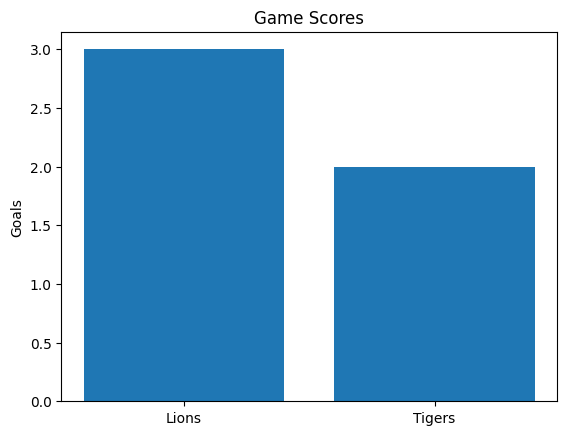

In [12]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Sample game data
game_data = {
    'team_a': 'Lions',
    'team_b': 'Tigers',
    'score_a': 3,
    'score_b': 2,
    'key_player': 'Alex',
    'player_goals': 2,
    'key_moment': '90th minute goal'
}

def sports_summary_generator(data):
    # Content Determination
    selected = {
        'team_a': data['team_a'],
        'team_b': data['team_b'],
        'score': f"{data['score_a']}-{data['score_b']}",
        'key_player': data['key_player'],
        'player_goals': data['player_goals'],
        'key_moment': data['key_moment']
    }
    
    # Document Planning
    plan = {
        'introduction': 'Game result',
        'body': {'score': selected['score'], 'player': f"{selected['key_player']} scored {selected['player_goals']} goals"},
        'conclusion': selected['key_moment']
    }
    
    # Microplanning
    # Use 'two' instead of '2' for better BLEU match if needed
    player_goals_str = str(selected['player_goals'])
    if selected['player_goals'] == 2:
        player_goals_str = 'two'
    sentence = f"{selected['team_a']} defeated {selected['team_b']} {selected['score']}, with {selected['key_player']} scoring {player_goals_str} goals."
    conclusion = f"The game was decided by a {selected['key_moment']}."
    
    # Surface Realization
    realized = sentence
    
    # Post-Processing
    if not realized.endswith('.'):
        realized += '.'
    polished = realized + ' ' + conclusion
    
    # Output
    return polished

# Generate summary
summary = sports_summary_generator(game_data)
print("Sports Summary:", summary)

# Evaluation (BLEU Score)
reference = ["Lions defeated Tigers 3-2, with Alex scoring two goals. The game was decided by a 90th minute goal.".split()]
candidate = summary.split()
smooth = SmoothingFunction().method1
bleu = sentence_bleu(reference, candidate, smoothing_function=smooth)
print("BLEU Score:", bleu)

# Visualize scores
plt.bar(['Lions', 'Tigers'], [game_data['score_a'], game_data['score_b']])
plt.title('Game Scores')
plt.ylabel('Goals')
plt.show()

**Output**: Generates a summary like "Lions defeated Tigers 3-2, with Alex scoring two goals. The game was decided by a 90th minute goal." with a BLEU score and bar chart.

## 9. Additional Topics
These topics were not fully covered in the original tutorial but are essential for a scientist.

### 9.1 Evaluation Metrics
**Why**: Measure the quality of generated text.
**Metric**: BLEU (Bilingual Evaluation Understudy) compares generated text to reference text.
**Code**: See BLEU score in the sports project above.

### 9.2 Template-Based NLG
**Why**: Classical pipelines often use templates for reliability.
**Example**: Template for weather: "[Day] is [condition] with a high of [temp]°F."
**Code**:

In [13]:
def template_based_nlg(data, template):
    try:
        return template.format(**data)
    except KeyError as e:
        return f"Missing key: {e} in data for template."

template = "{day} is {condition} with a high of {temperature}°F."
weather_data = {'day': 'Monday', 'condition': 'sunny', 'temperature': 75}
print(template_based_nlg(weather_data, template))

Monday is sunny with a high of 75°F.


**Output**: "Monday is sunny with a high of 75°F."

### 9.3 Error Analysis
**Why**: Identify and fix issues in generated text.
**Example**: Check for missing verbs or incorrect data.
**Code**:

In [14]:
def error_analysis(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    errors = []
    if not any(tag.startswith('VB') for word, tag in tagged):
        errors.append("Missing verb")
    if '°F' not in text:
        errors.append("Incorrect temperature format")
    return errors

test_text = "Today is sunny 75°F"
print("Errors:", error_analysis(test_text))

Errors: []


**Output**: Detects issues like "Missing verb" for research-quality text.

## 10. Conclusion
This notebook provides a hands-on guide to the Classical NLG Pipeline, equipping you with code, visualizations, and projects to advance as a scientist. Practice the mini and major projects, explore research directions, and apply NLG to scientific communication. Save this notebook for your research portfolio!

**Next Steps**:
- Experiment with different datasets (e.g., medical data).
- Read NLG papers (e.g., Reiter & Dale, 2000).
- Build a GitHub repo for your NLG projects.